In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
import scipy as sc
init_printing()

r_m, N, t = var("r_m N t",real = True) # the real bit is not really necessary here

In [4]:
N = Function('N')

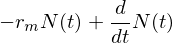

In [5]:
dN_dt = Derivative(N(t), t) - r_m*N(t); dN_dt

In [6]:
MyEq_sol = dsolve(dN_dt); MyEq_sol

$$\label{eq:exp_growth_sol} N{\left (t \right )} = N_0 e^{r_m t} $$

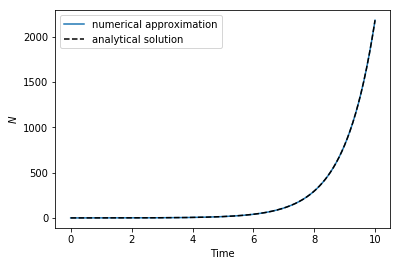

In [8]:
from scipy  import integrate

# parameters
r_m = 1.

# initial conditions
N_0 = 0.1

# The time vector
t_vec = sc.arange(0, 10., 0.01)

def exp_pop(N, t, r_m):
    """The right-hand side of the exponential growth ODE - Ordinary Differential Equation"""
    return r_m*N

N_vec = integrate.odeint(exp_pop, N_0, t_vec, args=(r_m,)) # the comma is needed!

# plot the numerical solution
plt.plot(t_vec, N_vec) 
plt.xlabel('Time') ; plt.ylabel('$N$') 

# plot analytical solution
plt.plot(t_vec, N_0 * sc.exp(r_m * t_vec),'k--')
plt.legend(['numerical approximation', 'analytical solution'], loc='best') # draw legend


# Logistic Pop. growth

In [9]:
r_m, K, N, t = var("r_m K N t",real = True) # the real bit is not really necessary here

N = Function('N')

$$\label{eq:logist_growth} \frac{\text{d}N}{\text{d}t} = r_m N \left(1-\frac{N}{K}\right) $$

K is carrying capacity

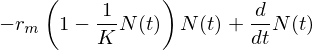

In [10]:
dN_dt = Derivative(N(t), t) - r_m * N(t) * (1 - N(t) / K); dN_dt

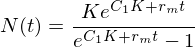

In [11]:
MyEq_sol = dsolve(dN_dt); MyEq_sol

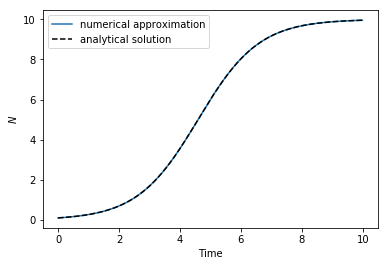

In [12]:
from scipy  import integrate

# parameters
r_m = 1.
K = 10.
# initial condition
N_0 = 0.1

#The time vector 
t_vec = sc.arange(0, 10., 0.01)

def log_pop(N, t, r_m, K):
    """The right-hand side of the logistic ODE"""
    return r_m*N*(1-N/K)

N_vec = integrate.odeint(log_pop, N_0, t_vec, args=(r_m, K));

plt.plot(t_vec, N_vec) # plot the solution
plt.xlabel('Time') ; plt.ylabel('$N$') 

# plot analytical solution
plt.plot(t_vec, K * N_0 * sc.exp(r_m * t_vec)/(K + N_0 * (sc.exp(r_m * t_vec) - 1.)),'k--')
plt.legend(['numerical approximation', 'analytical solution'], loc='best') # draw legend

# Lotka Voltera

In [15]:
r_m, a, e, z, K, N, C, t = var("r_m a e z K N C t",real = True)

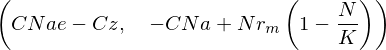

In [16]:
dN_dt = r_m * N * (1 -N/K) - a * N * C 
dC_dt = e * a * N * C - z * C

dC_dt, dN_dt





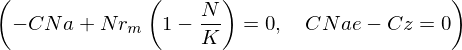

In [17]:
N_eqlb = Eq(dN_dt, 0)
C_eqlb = Eq(dC_dt, 0)
N_eqlb, C_eqlb

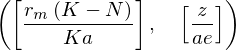

In [18]:
N_eqlb_sol = solve(N_eqlb, C)
C_eqlb_sol = solve(C_eqlb, N)

N_eqlb_sol, C_eqlb_sol

10000
[ 1.  1.]
0.999001013374


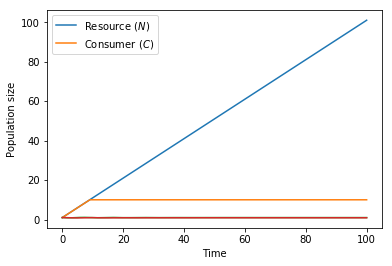

In [27]:
from scipy import integrate

t_vec = sc.arange(0, 100., 0.01)
print(len(t_vec))
# parameters
r_m = 1.
a = 1
e = 0.5
z = .5
K =10

# initial condition: this is an array now!
N0C0 = sc.array([1., 1.])

N0 = []

N0.append(1)

C0 = []

C0.append(1)
#def LV2(NC, t, r_m, K, a, e, z):
 #   return sc.array([(-NC[1]*NC[0]*a + NC[0]*r_m*(1 - N/K)), ((NC[1] * NC[0] * a * e) - (NC[1] * z)) ])

for index in range(1, len(t_vec)):
    dC = ((r_m*(K - N0[index-1]))/ (K * a)) > 0
    dN = (z/(a*e)) > 0 
        
    next_d = N0[index-1] + dN * 0.01
    next_c = C0[index-1] + dC * 0.01
        
    N0.append(next_d)
    C0.append(next_c)    
    
   
#def LV2(N0, C0, t, r_m, K, a, e, z):
    #return sc.array([(z/(a*e)) > 0 , ((r_m*(K - NC_vec[0]))/ (K * a)) >0 ])
# the function still receives only `x`, but it will be an array, not a number
def LV(NC, t, r_m, K, a, e, z):
    # Unlike the exponential and logistic growth model, we now need to convert 
    # the output to a numpy array as it has two populations.
    return sc.array([ r_m * NC[0]*(1-NC[0]/K) - a * NC[0] * NC[1],
                   e * a * NC[0] * NC[1] - z * NC[1] ])
print(N0C0)
NC_vec = integrate.odeint(LV, N0C0, t_vec, (r_m, K, a, e, z))
#NCe_vec = integrate.odeint(LV2, N0, C0, (t_vec, r_m, K, a, e, z))
print(NC_vec[1][0])

# Check NC_vec's dimensions:
# print(NC_vec.shape)

plt.plot(t_vec, N0)
plt.plot(t_vec, C0)
# plot the solution
#plt.plot(t_vec, NCe_vec)
plt.plot(t_vec, NC_vec)
#plt.hlines(NCe_vec[9999],t_vec[0], t_vec[-1])
plt.xlabel('Time'); plt.ylabel('Population size') # and of y-axis
plt.legend(['Resource ($N$)', 'Consumer ($C$)'], loc='best')
plt.show()

Initial condition: [ 1.  1.]


Text(0,0.5,'Consumer Population size')

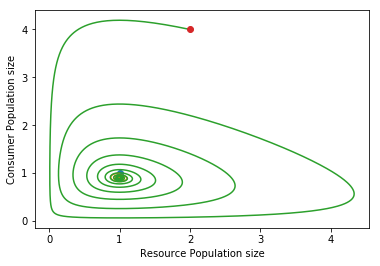

In [31]:
plt.plot(NC_vec[0,0], NC_vec[0,1], 'o')
print('Initial condition:', NC_vec[0])

plt.plot(NC_vec[:,0], NC_vec[:,1])

#Another solution with a different initial condition:
NC_vec2 = integrate.odeint(LV, [2., 4.], t_vec, (r_m, K, a, e, z))
plt.plot(NC_vec2[:,0], NC_vec2[:,1])
plt.plot(NC_vec2[0,0], NC_vec2[0,1], 'o')
plt.xlabel('Resource Population size'); plt.ylabel('Consumer Population size') # and of y-axis

/home/abi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


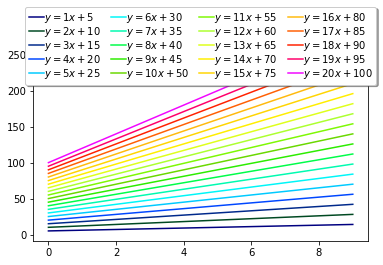

In [41]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = 20

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, .8, num_plots)])

# Plot several different functions...
x = np.arange(10)
labels = []
for i in range(1, num_plots + 1):
    plt.plot(x, i * x + 5 * i)
    labels.append(r'$y = %ix + %i$' % (i, 5*i))

# I'm basically just demonstrating several different legend options here...
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()